<a href="https://colab.research.google.com/github/ribka-5/Machine-Learning/blob/main/K_Nearest_Neighborhood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries dan dataset

In [ ]:
# menekan warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# visualisasi
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 10. data bad good.xlsx to 10. data bad good.xlsx


### Dataframe

In [ ]:
df = pd.read_excel('10. data bad good.xlsx', sheet_name='Sheet2')
df.head()

,Observasi,Tanggungan,Pendapatan,Usia,Status,Skor,Status pada fisher
0,1,6,10.0,39,Bad,-243095,bad
1,2,1,9.0,49,Bad,-422392,good
2,3,2,4.8,35,Bad,-201561,bad
3,4,0,4.9,52,Bad,-332358,bad
4,5,1,4.7,34,Bad,-23092,bad


##Checking Data

In [ ]:
df.isnull().sum()

Observasi             0
Tanggungan            0
Pendapatan            0
Usia                  0
Status                0
Skor                  0
Status pada fisher    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Observasi           100 non-null    int64  
 1   Tanggungan          100 non-null    int64  
 2   Pendapatan          100 non-null    float64
 3   Usia                100 non-null    int64  
 4   Status              100 non-null    object 
 5   Skor                100 non-null    int64  
 6   Status pada fisher  100 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 5.6+ KB


# Visualisasi Data

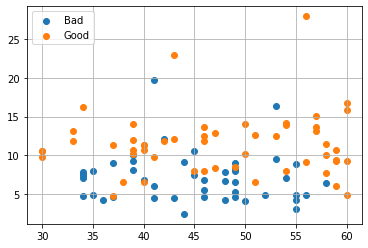

In [ ]:
fig, ax = plt.subplots()
for status, d in df.groupby('Status'):
  ax.scatter(d['Usia'],d['Pendapatan'], label=status)

plt.legend(loc='auto')
plt.grid(True)
plt.show()

## Training Dataset

In [ ]:
x_train = np.array(df[['Pendapatan', 'Usia']])
y_train = np.array(df['Status'])

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train = y_train.flatten()
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k= 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Keterangan:
-----------
###1 = merupakan status good
###0 = merupakan status bad

## Penambahan data anonim

In [ ]:
misterius = {
    'Pendapatan': [14, 5, 20],
    'Usia': [25, 30, 32],
    'Status': ['Good', 'Bad', 'Good']
}
data_anonim = pd.DataFrame(misterius)
data_anonim

,Pendapatan,Usia,Status
0,14,25,Good
1,5,30,Bad
2,20,32,Good


## Testing Data

In [ ]:
x_test = np.array(data_anonim[['Pendapatan','Usia']])
y_test = np.array(data_anonim['Status'])
y_test = lb.transform(y_test).flatten()

array([[14, 25],
       [ 5, 30],
       [20, 32]])

## Prediksi Data

In [ ]:
y_pred = model.predict(x_test)
y_pred = lb.transform(y_test)

# Visualisasi data dengan data anonim

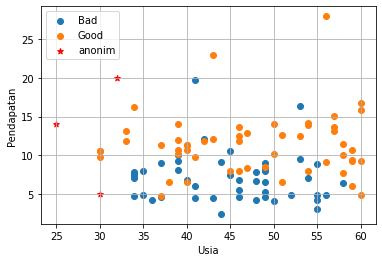

In [ ]:
fig, ax = plt.subplots()
for status, d in df.groupby('Status'):
  ax.scatter(d['Usia'],d['Pendapatan'], label=status)

plt.scatter(data_anonim['Usia'],data_anonim['Pendapatan'],marker='*',color='r',label='anonim')

plt.legend(loc='auto')
plt.xlabel('Usia')
plt.ylabel('Pendapatan')
plt.grid(True)
plt.show()

## Menghitung Euclidean distance terhadap data anonim
dalam mencari euclidean digunakan salah satu data saja

In [ ]:
from scipy.spatial.distance import euclidean

dist = [euclidean(x_test[0], d) for d in x_train]
dist[0:5]

[14.560219778561036,
 24.515301344262525,
 13.588230201170422,
 28.492279656075258,
 12.941792766073796]

In [ ]:
df['Jarak'] = dist
df.sort_values(['Jarak'])

,Observasi,Tanggungan,Pendapatan,Usia,Status,Skor,Status pada fisher,Jarak
49,50,2,10.6,30,Good,-377297,bad,6.046487
73,74,1,10.5,30,Good,-409927,good,6.103278
74,75,2,9.8,30,Good,-350802,bad,6.529931
81,82,4,13.2,33,Good,-401335,good,8.039900
48,49,5,11.8,33,Good,-319027,bad,8.296987
...,...,...,...,...,...,...,...,...
50,51,3,6.0,59,Good,-283858,bad,34.928498
66,67,3,15.9,60,Good,-615006,good,35.051533
47,48,1,16.7,60,Good,-713385,good,35.103988
56,57,2,9.2,60,Good,-429051,good,35.327610


# Pengecekkan akurasi klasifikasi KNN

In [ ]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test,y_pred)
print(f'classification report: \n{cls_report}')

classification report: 
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



pada akurasi diatas pada nilai precision bernilai 33%, untuk recall 100%, dan f1-score 50% data test dan prediksi